In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.callbacks import EarlyStopping

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database')

Found 4428 files belonging to 4 classes.


In [ ]:
class_names=data.class_names
class_names

['Cyclone', 'Earthquake', 'Flood', 'Wildfire']

In [ ]:
input_shape=(224,224,3)

In [ ]:
datagen=ImageDataGenerator(
                           shear_range=0.2,
                           zoom_range=0.2,
                           validation_split=0.2,
                           horizontal_flip=True
                           )

In [ ]:
training_data=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

Found 3544 images belonging to 4 classes.


In [ ]:
testing_data=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='validation')

Found 884 images belonging to 4 classes.


In [ ]:
base_model=VGG16(input_shape=input_shape,weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history=model.fit(x=training_data,validation_data=testing_data,epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 1667s 15s/step - accuracy: 0.3918 - loss: 7.3361 - val_accuracy: 0.5826 - val_loss: 1.0109
Epoch 2/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5576 - loss: 1.0691 - val_accuracy: 0.6244 - val_loss: 0.9512
Epoch 3/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6427 - loss: 0.9620 - val_accuracy: 0.6810 - val_loss: 0.8085
Epoch 4/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.6858 - loss: 0.8512 - val_accuracy: 0.6765 - val_loss: 0.8350
Epoch 5/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7039 - loss: 0.8462 - val_accuracy: 0.6833 - val_loss: 0.7957
Epoch 6/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6850 - loss: 0.8835 - val_accuracy: 0.7206 - val_loss: 0.7689
Epoch 7/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7458 - loss: 0.7103 - val_accuracy: 0.6957 - val_loss: 0.7712
Epoch 8/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7490 - loss: 0.7228 - val_ac

In [ ]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

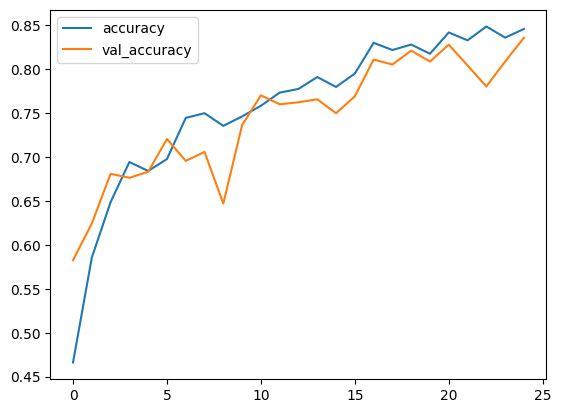

In [ ]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

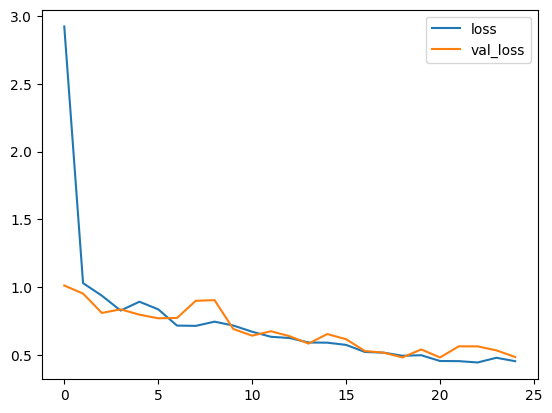

In [ ]:
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted class name: Earthquake


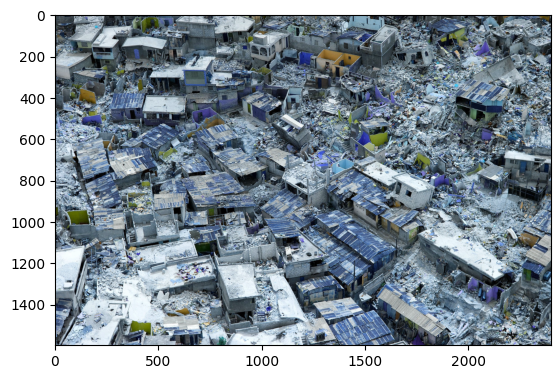

In [ ]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/10.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/10.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
prediction=np.argmax(result)
predict_class_name=class_names[prediction]
print('predicted class name:',predict_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
predicted class name: Cyclone


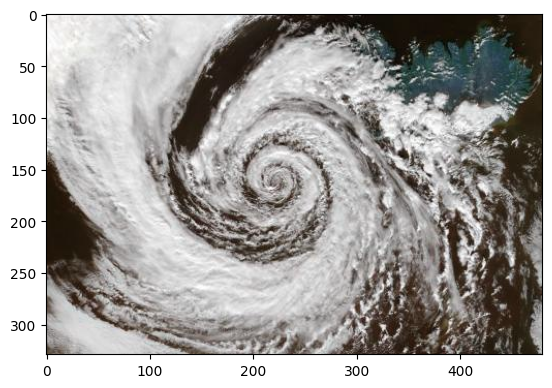

In [ ]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/121.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/121.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
prediction=np.argmax(result)
predict_class_name=class_names[prediction]
print('predicted class name:',predict_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicted class name: Flood


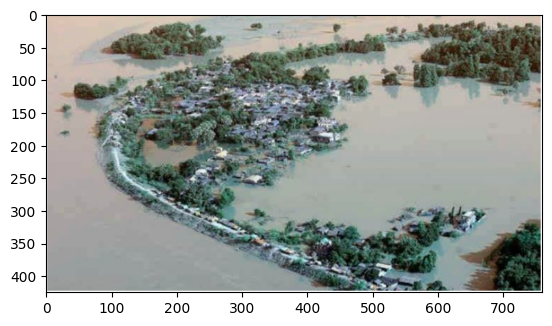

In [ ]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Flood/1022.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Flood/1022.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
prediction=np.argmax(result)
predict_class_name=class_names[prediction]
print('predicted class name:',predict_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicted class name: Wildfire


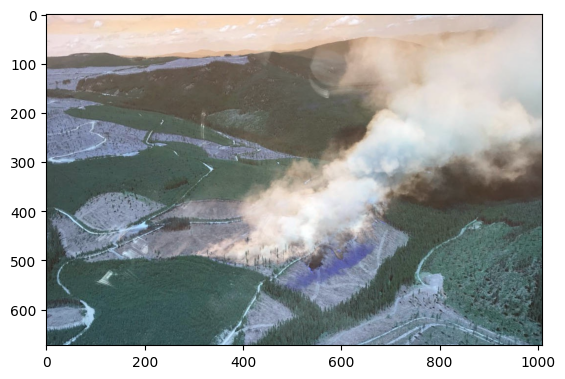

In [ ]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/1003.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/Final Project/Deep Learning/Disaster/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/1003.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
prediction=np.argmax(result)
predict_class_name=class_names[prediction]
print('predicted class name:',predict_class_name)